In [1]:
import pandas as pd
import math
import missingno as msno
import numpy as np
import scipy
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('subscribers.csv')

In [3]:
df.head(10)

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
5,284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,...,0.3303,ar,RAKBANK,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,NaN,True
6,192823,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,...,0.3303,ar,Standard Charter,14,True,1,2020-03-04 18:30:15,2020-07-04 18:30:15,NaN,True
7,315863,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,...,0.0000,ar,RAKBANK,14,True,1,2020-03-19 14:52:22,2020-07-19 14:52:22,NaN,True
8,254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,73.0,False,...,0.6606,ar,NaN,14,True,1,2020-03-08 17:50:25,2020-07-08 17:50:25,NaN,True
9,681969,23452753,economy,3.0,drama,replace OTT,28.751405,2.0,71.0,False,...,0.3303,ar,NaN,14,False,0,NaN,NaN,2020-01-27 00:00:00,False


# Data Processing

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

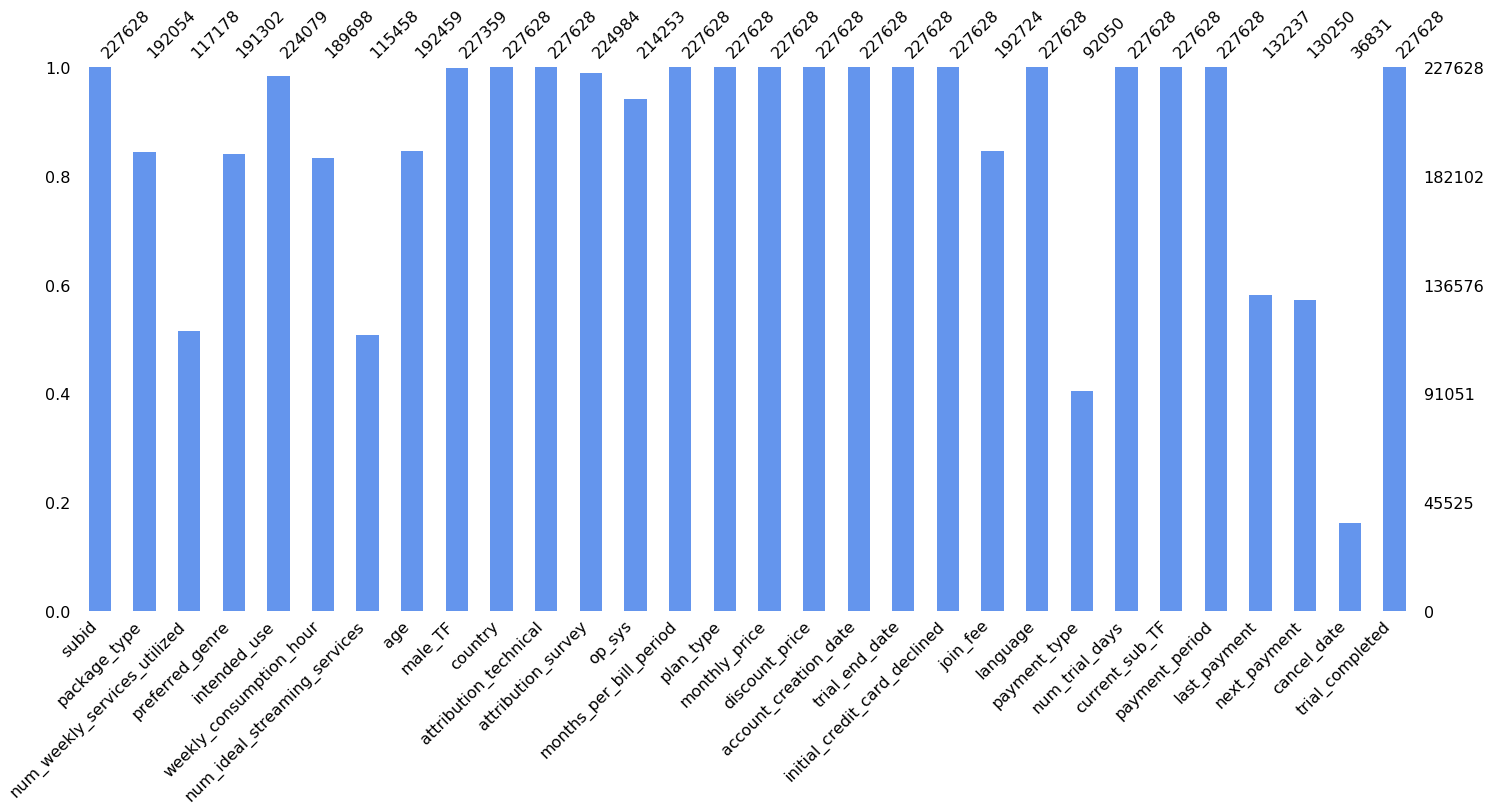

In [5]:
msno.bar(df,color = 'cornflowerblue')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         227628 non-null  int64  
 1   package_type                  192054 non-null  object 
 2   num_weekly_services_utilized  117178 non-null  float64
 3   preferred_genre               191302 non-null  object 
 4   intended_use                  224079 non-null  object 
 5   weekly_consumption_hour       189698 non-null  float64
 6   num_ideal_streaming_services  115458 non-null  float64
 7   age                           192459 non-null  float64
 8   male_TF                       227359 non-null  object 
 9   country                       227628 non-null  object 
 10  attribution_technical         227628 non-null  object 
 11  attribution_survey            224984 non-null  object 
 12  op_sys                        214253 non-nul

In [7]:
df.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,192724.000000,227628.000000,227628.000000
mean,2.498624e+07,3.008824,27.997724,2.061260,7.579755e+02,4.0,4.732049,4.512188,0.115145,13.989544,0.790122
std,2.885543e+06,0.820526,4.976341,0.245907,1.920204e+05,0.0,0.101049,0.097078,0.176971,0.382453,0.777713
min,2.000001e+07,0.000000,-32.146760,-1.000000,0.000000e+00,4.0,0.807400,0.770700,-0.660600,0.000000,0.000000
25%,2.248998e+07,2.000000,24.401536,2.000000,3.500000e+01,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
50%,2.497011e+07,3.000000,27.301448,2.000000,4.600000e+01,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
75%,2.749020e+07,3.000000,30.201361,2.000000,5.700000e+01,4.0,4.734300,4.514100,0.110100,14.000000,1.000000
max,2.999998e+07,14.000000,76.599962,7.000000,8.172000e+07,4.0,5.101300,5.027900,0.734000,14.000000,3.000000


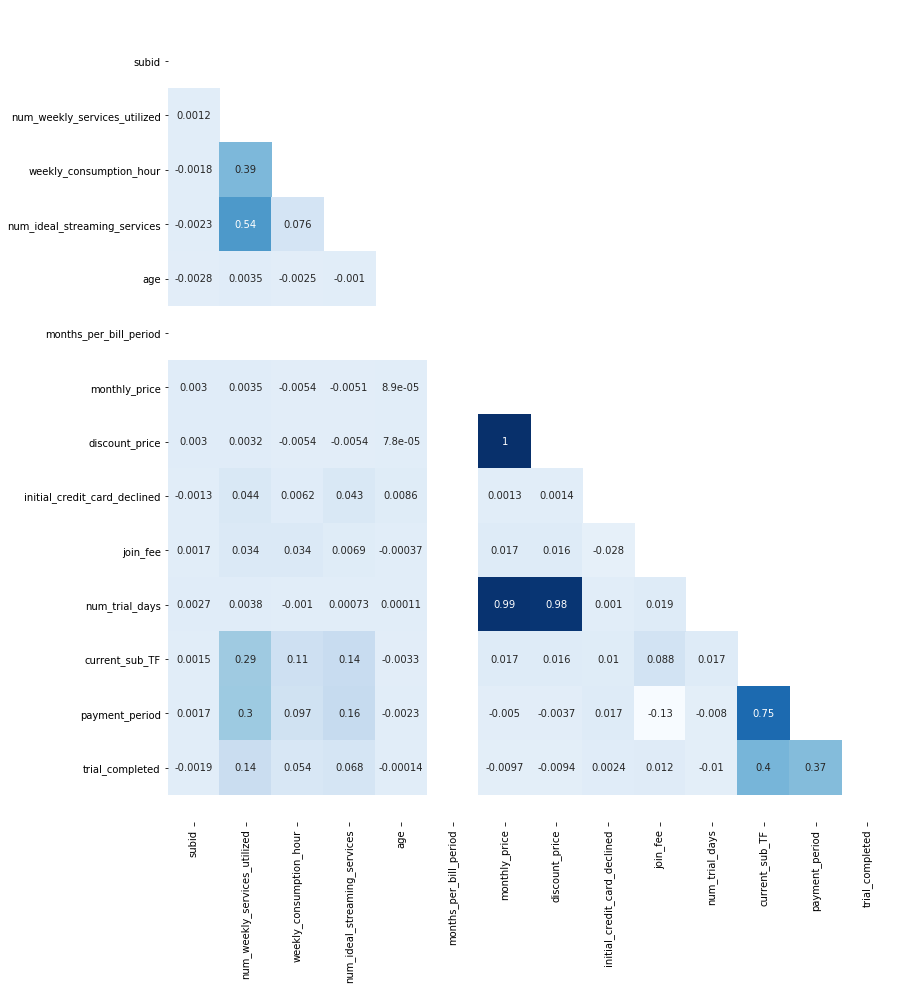

In [8]:
plt.figure(figsize=(13,15)) 
corr_mx = df.corr()
matrix = np.triu(corr_mx) # take upper correlation matrix
ax = sns.heatmap(corr_mx, annot=True, mask=matrix,cmap = plt.cm.Blues, cbar=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [9]:
#remove highly-correlated variables

del df['monthly_price']
del df['num_trial_days']

In [10]:
df['plan_type'].value_counts()

base_uae_14_day_trial                227096
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
high_jpy_14_day_trial                     1
low_sar_no_trial                          1
base_uae_no_trial_7_day_guarantee         1
low_eur_no_trial                          1
Name: plan_type, dtype: int64

In [11]:
#uae,eur,gbp...show the currency, so I group them into low/base/high no/14-days trial plans.

df["plan_type"] = np.where(df["plan_type"] == "base_uae_14_day_trial", "base_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "high_uae_14_day_trial", "high_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "low_uae_no_trial", "low_no_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "base_uae_14_day_trial", "base_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "high_sar_14_day_trial", "high_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "low_gbp_14_day_trial", "low_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "high_aud_14_day_trial", "high_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "low_eur_no_trial", "low_no_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "low_sar_no_trial", "low_no_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "base_eur_no_trial_7_day_guarantee", "base_no_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "high_jpy_14_day_trial", "high_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "base_eur_14_day_trial", "base_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "base_uae_no_trial_7_day_guarantee", "base_no_trial", df["plan_type"])

df['plan_type'].value_counts()

base_14_day_trial    227114
high_14_day_trial       340
low_no_trial            169
low_14_day_trial          4
base_no_trial             1
Name: plan_type, dtype: int64

In [12]:
#to simplify choices of pricing schemes (and taken the unbalanced data into consideration), 
#I only retain base_14_day_trial; high_14_day_trial and low_no_trial.

df = df[df['plan_type'] != 'base_no_trial']
df = df[df['plan_type'] != 'low_14_day_trial']

In [13]:
df['plan_type'].value_counts()

base_14_day_trial    227114
high_14_day_trial       340
low_no_trial            169
Name: plan_type, dtype: int64

In [14]:
df['account_creation_date'] = df['account_creation_date'].map(lambda x: str(x)[:7])
df['account_creation_date']

0         2020-01
1         2020-03
2         2019-12
3         2020-01
4         2019-10
           ...   
227623    2019-11
227624    2019-12
227625    2019-12
227626    2020-01
227627    2019-11
Name: account_creation_date, Length: 227623, dtype: object

In [15]:
df['language'].value_counts()

ar    227623
Name: language, dtype: int64

In [16]:
df['country'].value_counts()

UAE    227623
Name: country, dtype: int64

In [17]:
df = df.drop(['country','language'],axis=1)

In [18]:
#'months_per_bill_period' only has a value '4': meaningless
df['months_per_bill_period'].value_counts()

4    227623
Name: months_per_bill_period, dtype: int64

In [19]:
df = df.drop(['months_per_bill_period'],axis=1)
df = df.drop(['next_payment','last_payment'],axis=1)
df = df.drop(['cancel_date','trial_end_date'],axis=1)

In [20]:
#data cleaning: drop weekly consumption hour and number of ideal streaming services outliers
df.drop(df[df['weekly_consumption_hour'] < 0 ].index, inplace=True)
df.drop(df[df['num_ideal_streaming_services'] < 0 ].index, inplace=True)

In [21]:
#data cleaning: drop age outliers
df.drop(df[df['age'] > 100 ].index, inplace=True)
df.drop(df[df['age'] < 5 ].index, inplace=True)

# A/B testing

**Goal:** to see which of the following pricing scheme is the best: 1. low price no trial; 2. base price with trial; 3. high price with trial

**Method:** 1. A/B testing1: compare 'low price no trial' with 'base price with trial'; 2. A/B testing2: compare 'high price with trial' with 'base price with trial'

**Time scope:** A/B testing1: account creation date = 2019-07--2019-11; A/B testing2: account creation date = 2019-07--2019-11
    
**Test:** use two-sample z-test, because we know the population variance and the data size is large enough.

**Assumption:** the two population variances are equal.  


In [22]:
df['plan_type'].value_counts()

base_14_day_trial    226133
high_14_day_trial       340
low_no_trial            168
Name: plan_type, dtype: int64

In [23]:
df[df['plan_type'] == 'low_no_trial']['account_creation_date'].value_counts()

2019-07    146
2019-11      8
2019-08      6
2019-09      4
2019-10      4
Name: account_creation_date, dtype: int64

In [24]:
df[df['plan_type'] == 'base_14_day_trial']['account_creation_date'].value_counts()

2020-02    27998
2019-11    26371
2020-03    26103
2019-07    25408
2019-08    25312
2019-12    25202
2020-01    24713
2019-10    22312
2019-09    20068
2019-06     2646
Name: account_creation_date, dtype: int64

In [25]:
df[df['plan_type'] == 'high_14_day_trial']['account_creation_date'].value_counts()

2019-11    325
2019-07      5
2019-08      3
2019-09      2
2020-01      2
2019-10      2
2020-03      1
Name: account_creation_date, dtype: int64

In [26]:
pd.options.display.max_columns = 10


def calc_proportion(array_TF):
    return sum(array_TF)/len(array_TF)


def calc_standard_error(p_f, n_f, phat_f, nhat_f, num_samples_f=1):
    # if we assume one sample (Variant B) and Variant A as baseline = population, p_f and n_f are variant A stats
    if num_samples_f == 1:
        std_err_f = np.sqrt(p_f*(1-p_f)/nhat_f)
        print('Std err for %d sample test: np.sqrt(%3.3f * (1 - %3.3f)/ %d) = %3.4f' % (num_samples_f, p_f, p_f, nhat_f, std_err_f))
        return std_err_f
    # if we assume two samples (Variant A and Variant B both), p_f, n_f, phat_f, nhat_f are the values for each sample
    if num_samples_f == 2:
        std_err_f = np.sqrt((p_f*(1-p_f)/n_f) + (phat_f * (1-phat_f) / nhat_f))
        print('Std err for %d sample test: np.sqrt((%3.3f*(1-%3.3f)/%d) + (%3.3f * (1-%3.3f) / %d))' % (num_samples_f, p_f, p_f, n_f, phat_f, phat_f, nhat_f))
        return std_err_f


def calc_zscore(phat_f, nhat_f, p_f, n_f=1, num_samples_f=1, two_sample_diff_f=0):
    print('Conducting test assuming %d samples' % num_samples_f)
    print('z = ((%3.3f - %3.3f) - %d)/std_error' % (phat_f, p_f, two_sample_diff_f))
    return ((phat_f - p_f) - two_sample_diff_f)/calc_standard_error(p_f, n_f, phat_f, nhat_f, num_samples_f)


def get_z_crit_value(alpha_f, num_sides_f):
    return norm.ppf(1-(alpha_f/num_sides_f))


def get_p_value(zscore_f, num_sides_f):
    return 1 - ((1-norm.cdf(abs(zscore_f))) * num_sides_f)


def reject_null(variantA_outcomes_f, variantB_outcomes_f, alpha_f, num_sides_f, num_samples_f):
    phat_f = calc_proportion(variantB_outcomes_f)
    nhat_f = len(variantB_outcomes_f)
    p_f = calc_proportion(variantA_outcomes_f)
    n_f = len(variantA_outcomes_f)
    print('Proportion 1 (Variant A): %2.3f (%d obs)' % (p_f, n_f))
    print('Proportion 2 (Variant B): %2.3f (%d obs)' % (phat_f, nhat_f))
    z_score_f = calc_zscore(phat_f, nhat_f, p_f, n_f, num_samples_f)
    p_value_f = get_p_value(z_score_f, num_sides_f)
    z_crit_f = get_z_crit_value(alpha_f, num_sides_f)

    return z_score_f > z_crit_f, z_score_f, p_value_f

## A/B testing1: low_no VS. base_14

In [27]:
# df_ab1 = df[df['plan_type'] != 'high_14_day_trial']
# df_ab1 = df_ab1[df_ab1['account_creation_date'] == '2019-07']

In [28]:
df_ab1 = df[df['plan_type'] != 'high_14_day_trial']
date_list = ["2019-07", "2019-08", "2019-09", "2019-10", "2019-11"]
df_ab1 = df_ab1[df_ab1['account_creation_date'].isin(date_list)]

In [30]:
df_ab1_low = df_ab1[df_ab1['plan_type'] == 'low_no_trial']
df_ab1_base = df_ab1[df_ab1['plan_type'] == 'base_14_day_trial']

### Hypothesis


**null hypo:** convert_low = convert_base_1
    

**alternative hypo:** convert_low > convert_base_1

In [31]:
convert_low = calc_proportion(df_ab1_low['payment_period'] >= 1)
convert_base_1 = calc_proportion(df_ab1_base['payment_period'] >= 1)

print(convert_low)
print(convert_base_1)

0.5297619047619048
0.5629650710214195


In [32]:
calc_standard_error(convert_base_1, df_ab1_base.shape[0], convert_low, df_ab1_low.shape[0], num_samples_f=1)

Std err for 1 sample test: np.sqrt(0.563 * (1 - 0.563)/ 168) = 0.0383


0.038268739560731145

In [33]:
calc_zscore(convert_low, df_ab1_low.shape[0], convert_base_1, n_f=1, num_samples_f=1, two_sample_diff_f=0)

Conducting test assuming 1 samples
z = ((0.530 - 0.563) - 0)/std_error
Std err for 1 sample test: np.sqrt(0.563 * (1 - 0.563)/ 168) = 0.0383


-0.8676315614425303

In [34]:
get_z_crit_value(alpha_f=0.05, num_sides_f=1)

1.6448536269514722

In [35]:
reject_null(df_ab1_base['payment_period'] >= 1, df_ab1_low['payment_period'] >= 1, 0.05, 1, 1)

Proportion 1 (Variant A): 0.563 (119471 obs)
Proportion 2 (Variant B): 0.530 (168 obs)
Conducting test assuming 1 samples
z = ((0.530 - 0.563) - 0)/std_error
Std err for 1 sample test: np.sqrt(0.563 * (1 - 0.563)/ 168) = 0.0383


(False, -0.8676315614425303, 0.8072019686456386)



### Conclusion: 


We cannot reject the null hypothesis at 95% confidence level, meaning that we cannot say that the low price without trial pricing scheme is better than the base price with 14-days trial pricing scheme.




## A/B testing2: high_14 VS. base_14

In [36]:
# df_ab2 = df[df['plan_type'] != 'low_no_trial']
# df_ab2 = df_ab2[df_ab2['account_creation_date'] == '2019-11']

df_ab2 = df[df['plan_type'] != 'low_no_trial']
date_list = ["2019-07", "2019-08", "2019-09", "2019-10", "2019-11"]
df_ab2 = df_ab2[df_ab2['account_creation_date'].isin(date_list)]

In [38]:
df_ab2_high = df_ab2[df_ab2['plan_type'] == 'high_14_day_trial']
df_ab2_base = df_ab2[df_ab2['plan_type'] == 'base_14_day_trial']

### Hypothesis


**null hypo:** convert_high = convert_base_1
    

**alternative hypo:** convert_high > convert_base_1

In [39]:
convert_high = calc_proportion(df_ab2_high['payment_period'] >= 1)
convert_base_2 = calc_proportion(df_ab2_base['payment_period'] >= 1)

print(convert_high)
print(convert_base_2)

0.6468842729970327
0.5629650710214195


In [40]:
calc_standard_error(convert_base_2, df_ab2_base.shape[0], convert_high, df_ab2_high.shape[0], num_samples_f=1)

Std err for 1 sample test: np.sqrt(0.563 * (1 - 0.563)/ 337) = 0.0270


0.027019906928396176

In [41]:
calc_zscore(convert_high, df_ab2_high.shape[0], convert_base_2, n_f=1, num_samples_f=1, two_sample_diff_f=0)

Conducting test assuming 1 samples
z = ((0.647 - 0.563) - 0)/std_error
Std err for 1 sample test: np.sqrt(0.563 * (1 - 0.563)/ 337) = 0.0270


3.1058286839404152

In [42]:
get_z_crit_value(alpha_f=0.05, num_sides_f=1)

1.6448536269514722

In [43]:
reject_null(df_ab2_base['payment_period'] >= 1, df_ab2_high['payment_period'] >= 1, 0.05, 1, 1)

Proportion 1 (Variant A): 0.563 (119471 obs)
Proportion 2 (Variant B): 0.647 (337 obs)
Conducting test assuming 1 samples
z = ((0.647 - 0.563) - 0)/std_error
Std err for 1 sample test: np.sqrt(0.563 * (1 - 0.563)/ 337) = 0.0270


(True, 3.1058286839404152, 0.9990512669401731)


### Conclusion: 


We can reject the null hypothesis at 95% confidence level, meaning that we are 95% confident to say that the high price with 14-days trial pricing scheme is better than the base price with 14-days trial pricing scheme.





## Conclusion of the two A/B tests: 


Low priced plan without trial is the best pricing scheme.

In [44]:
df_ab1_low['discount_price'].value_counts()

1.0276    166
0.7707      1
1.1744      1
Name: discount_price, dtype: int64

In [45]:
df_ab1_base['discount_price'].value_counts()

4.5141    119458
4.2205        13
Name: discount_price, dtype: int64

In [46]:
df_ab2_high['discount_price'].value_counts()

5.0279    325
4.0737     10
3.7801      2
Name: discount_price, dtype: int64


### Finding: 


For low priced plan, the discount price is set pretty low- about 1.

For base priced plan, the discount price is about 4.5.

For high priced plan, the discount price is about 5.


The higher conversion rate of high priced plan is maybe because the gap between 4.5 and 5 is smaller. Customers are willing to pay additional 0.5 for better products.




# Customer Segmentation

In [48]:
#create a data frame without 'num_weekly_services_utilized', 'num_ideal_streaming_services' and 'payment_type'
df1 = df.copy()

In [49]:
df1 = df1.drop(['subid','payment_period','trial_completed', 'current_sub_TF','join_fee','plan_type',
                'package_type','discount_price','payment_type','attribution_technical','attribution_survey',
                'account_creation_date','initial_credit_card_declined'],axis=1)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226641 entries, 0 to 227627
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   num_weekly_services_utilized  116710 non-null  float64
 1   preferred_genre               190523 non-null  object 
 2   intended_use                  223107 non-null  object 
 3   weekly_consumption_hour       188717 non-null  float64
 4   num_ideal_streaming_services  114994 non-null  float64
 5   age                           191472 non-null  float64
 6   male_TF                       226372 non-null  object 
 7   op_sys                        213393 non-null  object 
dtypes: float64(4), object(4)
memory usage: 15.6+ MB


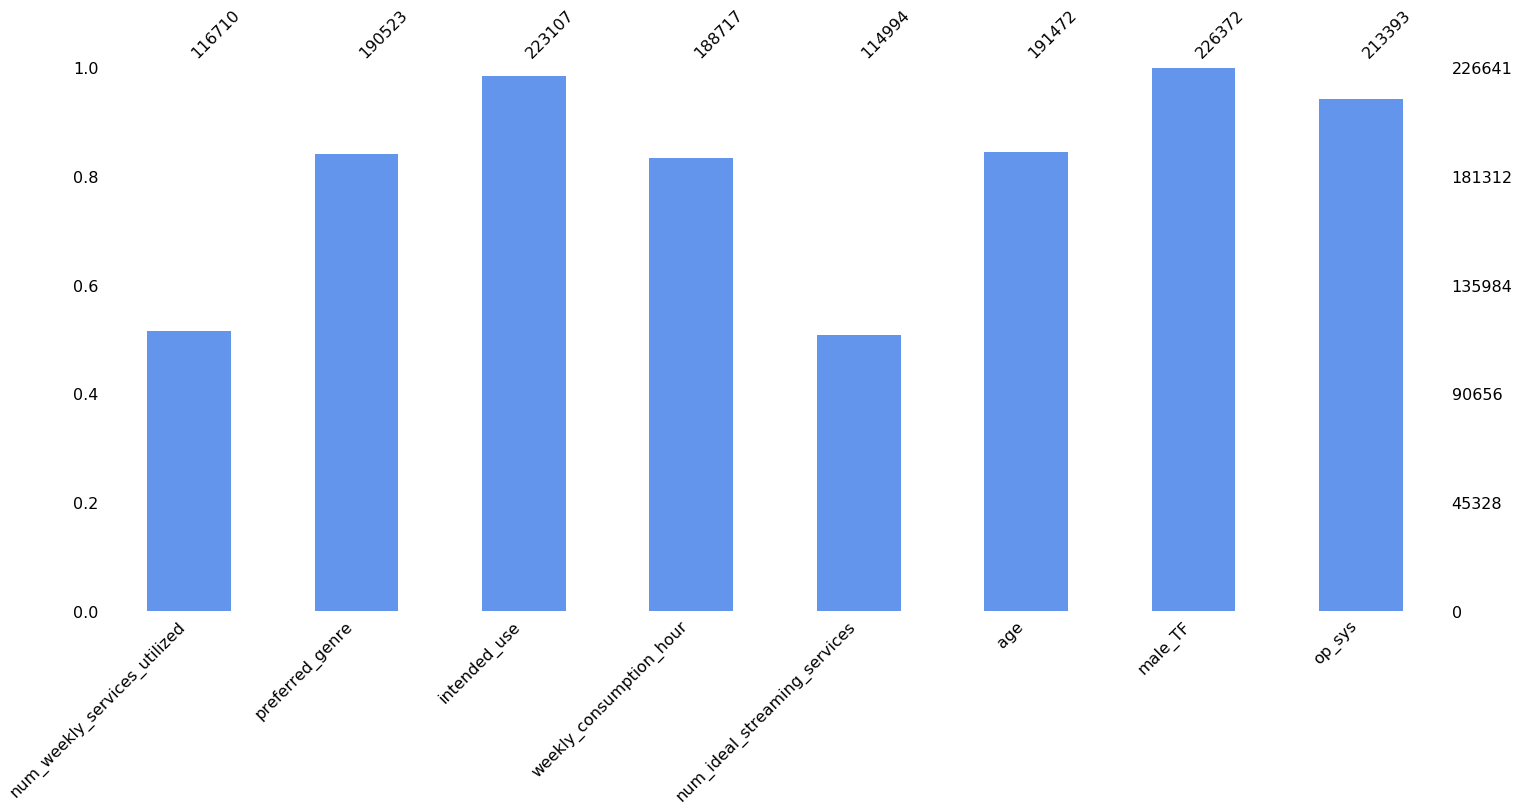

In [51]:
msno.bar(df1,color = 'cornflowerblue')

In [52]:
df1 = df1.dropna()

In [53]:
df_ = df1.copy()

In [54]:
df1 = pd.get_dummies(df1, columns=['preferred_genre','intended_use','op_sys'])

In [55]:
df1['male_TF'] = df1['male_TF'].astype(int)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92577 entries, 2 to 227624
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   num_weekly_services_utilized              92577 non-null  float64
 1   weekly_consumption_hour                   92577 non-null  float64
 2   num_ideal_streaming_services              92577 non-null  float64
 3   age                                       92577 non-null  float64
 4   male_TF                                   92577 non-null  int64  
 5   preferred_genre_comedy                    92577 non-null  uint8  
 6   preferred_genre_drama                     92577 non-null  uint8  
 7   preferred_genre_international             92577 non-null  uint8  
 8   preferred_genre_other                     92577 non-null  uint8  
 9   preferred_genre_regional                  92577 non-null  uint8  
 10  intended_use_access to exclusive 

In [57]:
feature_x = [tag for tag in df1]
print('feature:\n', feature_x)
X = df1[feature_x].values
num_samples, num_features = X.shape
print('feature dim:', X.shape)

feature:
 ['num_weekly_services_utilized', 'weekly_consumption_hour', 'num_ideal_streaming_services', 'age', 'male_TF', 'preferred_genre_comedy', 'preferred_genre_drama', 'preferred_genre_international', 'preferred_genre_other', 'preferred_genre_regional', 'intended_use_access to exclusive content', 'intended_use_education', 'intended_use_expand international access', 'intended_use_expand regional access', 'intended_use_other', 'intended_use_replace OTT', 'intended_use_supplement OTT', 'op_sys_Android', 'op_sys_iOS']
feature dim: (92577, 19)


In [58]:
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
  
# fitting 
scalar.fit(df1) 
X_scaled = scalar.transform(df1) 

In [59]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,...,14,15,16,17,18
0,-0.014183,1.641154,-0.248793,-1.529068,2.604265,...,-0.187218,1.325422,-0.414722,-0.717703,0.717703
1,1.199353,-1.055979,3.824873,-1.304641,-0.383986,...,-0.187218,1.325422,-0.414722,-0.717703,0.717703
2,-1.227720,-1.655342,-0.248793,1.164054,-0.383986,...,-0.187218,-0.754476,-0.414722,1.393334,-1.393334
3,-0.014183,1.341473,-0.248793,-1.678685,-0.383986,...,-0.187218,-0.754476,-0.414722,-0.717703,0.717703
4,-0.014183,0.142747,-0.248793,1.912143,-0.383986,...,-0.187218,1.325422,-0.414722,1.393334,-1.393334
...,...,...,...,...,...,...,...,...,...,...,...
92572,1.199353,-0.156934,-0.248793,-0.107698,-0.383986,...,-0.187218,-0.754476,-0.414722,-0.717703,0.717703
92573,-0.014183,0.442429,-0.248793,-1.005405,-0.383986,...,-0.187218,-0.754476,-0.414722,1.393334,-1.393334
92574,-1.227720,-0.756297,-0.248793,-0.182507,-0.383986,...,-0.187218,-0.754476,-0.414722,-0.717703,0.717703
92575,-0.014183,0.142747,-0.248793,-0.556551,-0.383986,...,-0.187218,-0.754476,2.411254,-0.717703,0.717703


In [60]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=2020)
y_pred = kmeans.fit_predict(X_scaled)

In [61]:
def visualize_cluster_result(x, dim1, dim2, y_pred, k):
    # select two feature dims: dim1, dim2, visualize the clusters
    assert dim1 in range(x.shape[1])
    assert dim2 in range(x.shape[1])
    ax = plt.subplot()
    # use a for loop to plot each cluster (with different colors)
    for i in range(k):
        ax.scatter(x[y_pred == i, dim1], x[y_pred ==  i, dim2], label='cluster: %d' % i)
    plt.title('Visualization of clustering of dim %d and dim %d' % (dim1, dim2))
    ax.set_xlabel('dim: %d' % dim1)
    ax.set_ylabel('dim: %d' % dim2)
    ax.legend()
    plt.show()

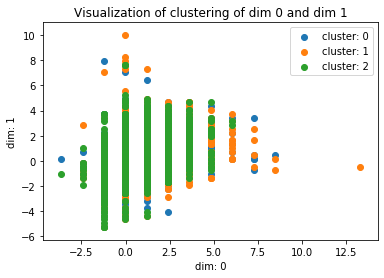

In [62]:
visualize_cluster_result(X_scaled, 0, 1, y_pred, 3)

In [63]:
# criterion: inertia
inertias = {}
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(X_scaled)  # here we do not use fit_transform since we don't need the transformed result
    inertias[k] = kmeans.inertia_
print(inertias)

{2: 1571891.710012622, 3: 1469205.4533933895, 4: 1370177.2472106721, 5: 1267745.8853844046}


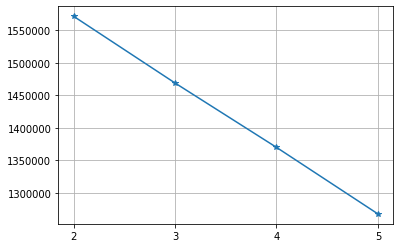

In [64]:
ax = plt.subplot()
ax.plot(np.array(list(inertias.keys())), np.array(list(inertias.values())), '-*')
ax.set_xticks(np.arange(2, 6))
ax.grid()
plt.show()

In [65]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3)
gmm.fit(X_scaled)

GaussianMixture(n_components=3)

In [66]:
from matplotlib.patches import Ellipse
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 8

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("U.A.")
    plt.ylabel("U.A.")
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [67]:
#But do we really want to use 3 clusters?

n_clusters=np.arange(2, 6)
bics=[]
bics_err=[]
iterations=6
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(X_scaled) 
        
        tmp_bic.append(gmm.bic(X_scaled))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

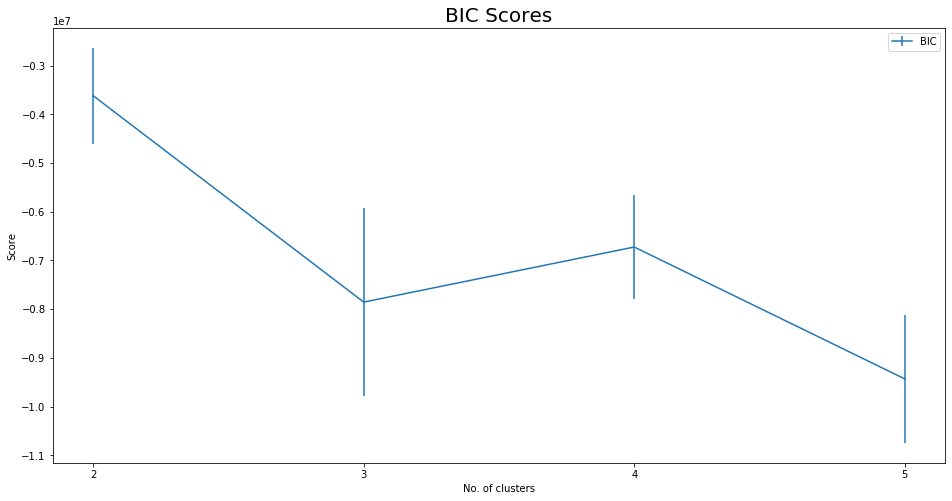

In [68]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("No. of clusters")
plt.ylabel("Score")
plt.legend()

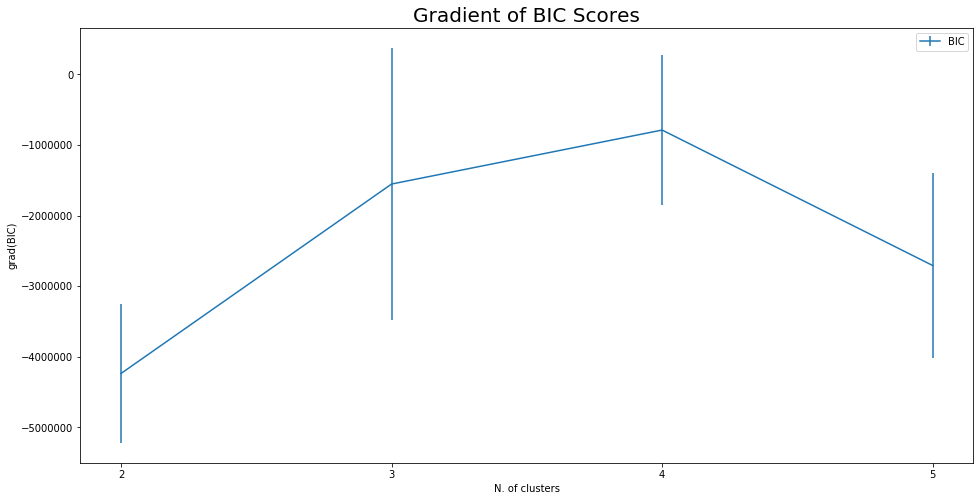

In [69]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

In [70]:
gmm = GMM(n_components=3)
gmm.fit(X_scaled)

GaussianMixture(n_components=3)

In [71]:
labels = gmm.predict(X_scaled)
frame = pd.DataFrame(X_scaled)
frame['cluster'] = labels
frame.columns = ['num_weekly_services_utilized', 'weekly_consumption_hour', 'num_ideal_streaming_services', 'age', 'male_TF', 'preferred_genre_comedy', 'preferred_genre_drama', 'preferred_genre_international', 'preferred_genre_other', 'preferred_genre_regional', 'intended_use_access to exclusive content', 'intended_use_education', 'intended_use_expand international access', 'intended_use_expand regional access', 'intended_use_other', 'intended_use_replace OTT', 'intended_use_supplement OTT', 'op_sys_Android', 'op_sys_iOS','cluster']

In [72]:
frame['cluster'].value_counts()

2    59363
1    30565
0     2649
Name: cluster, dtype: int64

In [73]:
frame

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,cluster
0,-0.014183,1.641154,-0.248793,-1.529068,2.604265,...,1.325422,-0.414722,-0.717703,0.717703,2
1,1.199353,-1.055979,3.824873,-1.304641,-0.383986,...,1.325422,-0.414722,-0.717703,0.717703,2
2,-1.227720,-1.655342,-0.248793,1.164054,-0.383986,...,-0.754476,-0.414722,1.393334,-1.393334,1
3,-0.014183,1.341473,-0.248793,-1.678685,-0.383986,...,-0.754476,-0.414722,-0.717703,0.717703,2
4,-0.014183,0.142747,-0.248793,1.912143,-0.383986,...,1.325422,-0.414722,1.393334,-1.393334,1
...,...,...,...,...,...,...,...,...,...,...,...
92572,1.199353,-0.156934,-0.248793,-0.107698,-0.383986,...,-0.754476,-0.414722,-0.717703,0.717703,2
92573,-0.014183,0.442429,-0.248793,-1.005405,-0.383986,...,-0.754476,-0.414722,1.393334,-1.393334,1
92574,-1.227720,-0.756297,-0.248793,-0.182507,-0.383986,...,-0.754476,-0.414722,-0.717703,0.717703,2
92575,-0.014183,0.142747,-0.248793,-0.556551,-0.383986,...,-0.754476,2.411254,-0.717703,0.717703,2


In [74]:
df_['pred'] = pd.Series(labels, index=df_.index)
df_.to_excel (r'/Users/h.xy/Documents/NYU/MA/project/predictions5.xlsx', index = False, header=True)

# Churn Model

In [484]:
df2 = pd.read_csv('subscribers.csv')

In [485]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227628 non-null  int64  
 1   subid                         227628 non-null  int64  
 2   package_type                  192054 non-null  object 
 3   num_weekly_services_utilized  117178 non-null  float64
 4   preferred_genre               191302 non-null  object 
 5   intended_use                  224079 non-null  object 
 6   weekly_consumption_hour       189698 non-null  float64
 7   num_ideal_streaming_services  115458 non-null  float64
 8   age                           192459 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  country                       227628 non-null  object 
 11  attribution_technical         227628 non-null  object 
 12  attribution_survey            224984 non-nul

In [486]:
df2["plan_type"] = np.where(df2["plan_type"] == "base_uae_14_day_trial", "base_14_day_trial", df2["plan_type"])
df2["plan_type"] = np.where(df2["plan_type"] == "high_uae_14_day_trial", "high_14_day_trial", df2["plan_type"])
df2["plan_type"] = np.where(df2["plan_type"] == "low_uae_no_trial", "low_no_trial", df2["plan_type"])
df2["plan_type"] = np.where(df2["plan_type"] == "base_uae_14_day_trial", "base_14_day_trial", df2["plan_type"])
df2["plan_type"] = np.where(df2["plan_type"] == "high_sar_14_day_trial", "high_14_day_trial", df2["plan_type"])
df2["plan_type"] = np.where(df2["plan_type"] == "low_gbp_14_day_trial", "low_14_day_trial", df2["plan_type"])
df2["plan_type"] = np.where(df2["plan_type"] == "high_aud_14_day_trial", "high_14_day_trial", df2["plan_type"])
df2["plan_type"] = np.where(df2["plan_type"] == "low_eur_no_trial", "low_no_trial", df2["plan_type"])
df2["plan_type"] = np.where(df2["plan_type"] == "low_sar_no_trial", "low_no_trial", df2["plan_type"])
df2["plan_type"] = np.where(df2["plan_type"] == "base_eur_no_trial_7_day_guarantee", "base_no_trial", df2["plan_type"])
df2["plan_type"] = np.where(df2["plan_type"] == "high_jpy_14_day_trial", "high_14_day_trial", df2["plan_type"])
df2["plan_type"] = np.where(df2["plan_type"] == "base_eur_14_day_trial", "base_14_day_trial", df2["plan_type"])
df2["plan_type"] = np.where(df2["plan_type"] == "base_uae_no_trial_7_day_guarantee", "base_no_trial", df2["plan_type"])

df2 = df2[df2['plan_type'] != 'base_no_trial']
df2 = df2[df2['plan_type'] != 'low_14_day_trial']

In [487]:
df2['account_creation_date'] = df2['account_creation_date'].map(lambda x: str(x)[:7])
#df2['account_creation_date']

In [488]:
# df2['package_type'][df2['plan_type'] == 'low_no_trial'].value_counts()

In [489]:
df2 = df2.drop(['Unnamed: 0','package_type','country','payment_type','subid',
                'attribution_technical','attribution_survey', 'language','join_fee',
                'package_type','months_per_bill_period',
                'monthly_price','next_payment','trial_end_date',
               'cancel_date','last_payment','account_creation_date','num_trial_days'],axis=1)

In [490]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227623 entries, 0 to 227627
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   num_weekly_services_utilized  117174 non-null  float64
 1   preferred_genre               191298 non-null  object 
 2   intended_use                  224075 non-null  object 
 3   weekly_consumption_hour       189693 non-null  float64
 4   num_ideal_streaming_services  115454 non-null  float64
 5   age                           192454 non-null  float64
 6   male_TF                       227354 non-null  object 
 7   op_sys                        214248 non-null  object 
 8   plan_type                     227623 non-null  object 
 9   discount_price                227623 non-null  float64
 10  initial_credit_card_declined  227623 non-null  bool   
 11  current_sub_TF                227623 non-null  bool   
 12  payment_period                227623 non-nul

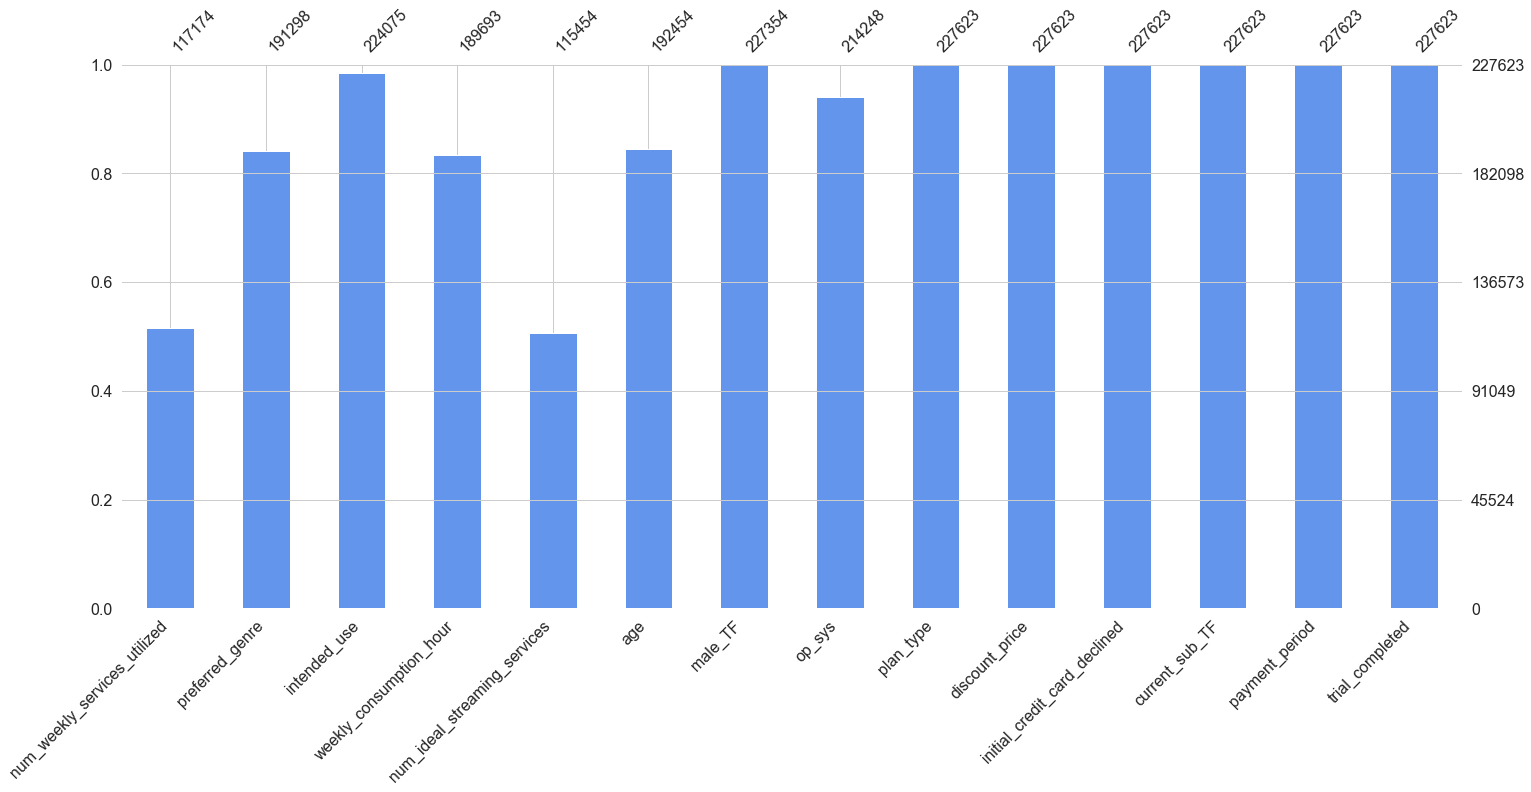

In [491]:
msno.bar(df2,color = 'cornflowerblue')

In [495]:
#df_0["churn_pred"] = np.where(df_0["current_sub_TF"], 0, 1)


#new customer churn
#churn 1: people who do not pay after trial payment period=0, trial completed=True
#not churn 0: people who pay for at least 1 period after trial payment completed. payment period >0,trial completed=True

df2["churn_pred"] = np.where(df2["trial_completed"], np.where(df2["payment_period"] == 0, 1, np.where(df2["payment_period"] > 0, 0, "none")), "none")


In [496]:
# df_temp = df_0[df_0["current_sub_TF"] == True]
# df_temp

In [497]:
# df_123["churn_pred"] = np.where(df_123["trial_completed"], np.where(df_123["payment_period"] == 0, 1, np.where(df_123["payment_period"] > 0, 0, "none")), "none")



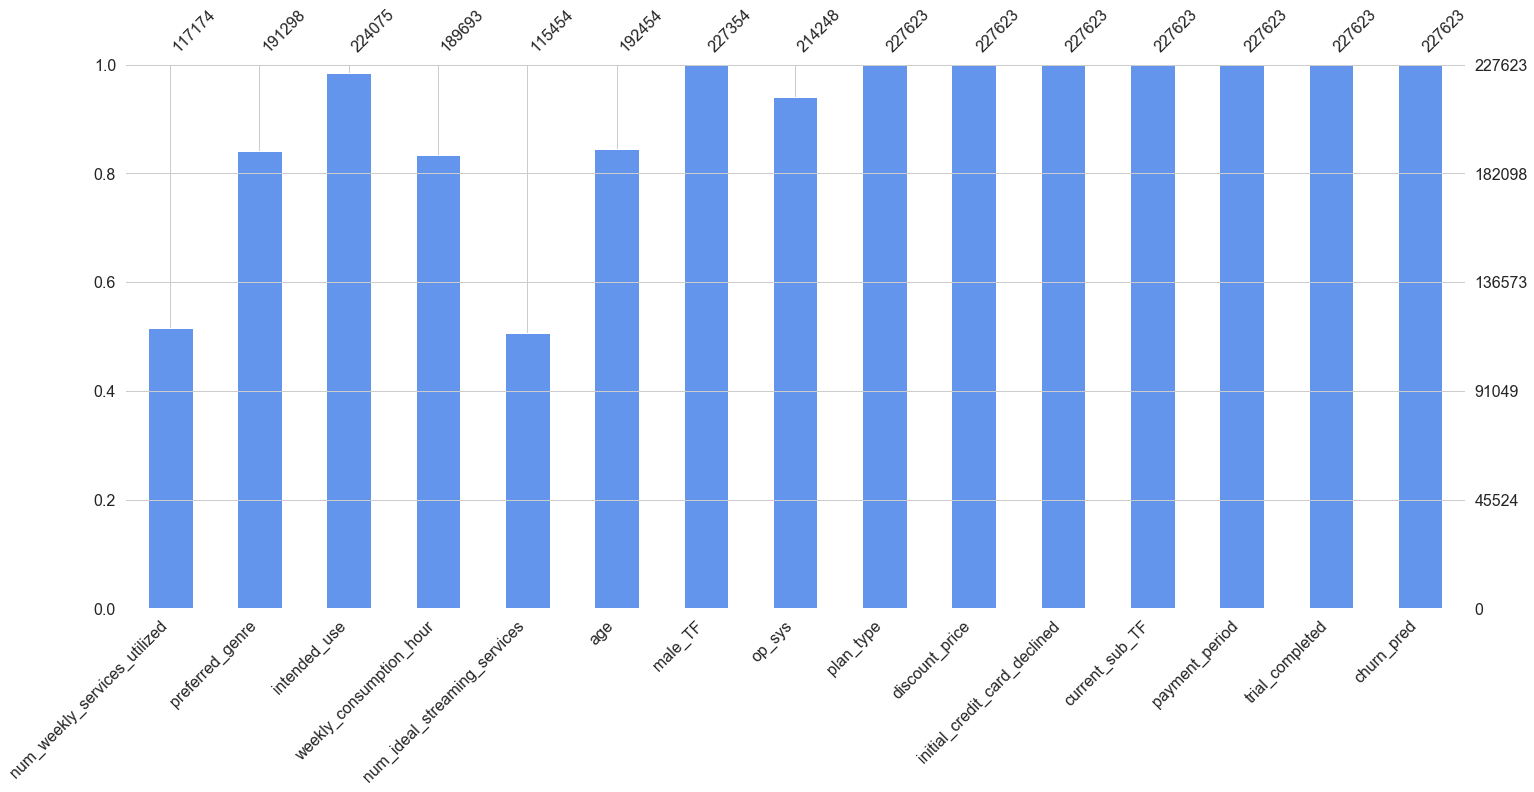

In [498]:
msno.bar(df2,color = 'cornflowerblue')

In [499]:
# df_0['num_weekly_services_utilized']=df_0['num_weekly_services_utilized'].fillna((df_0['num_weekly_services_utilized'].mean()))
# df_0['num_ideal_streaming_services']=df_0['num_ideal_streaming_services'].fillna((df_0['num_ideal_streaming_services'].mean()))

In [500]:
df2['num_weekly_services_utilized']=df2['num_weekly_services_utilized'].fillna((df2['num_weekly_services_utilized'].mean()))
df2['num_ideal_streaming_services']=df2['num_ideal_streaming_services'].fillna((df2['num_ideal_streaming_services'].mean()))

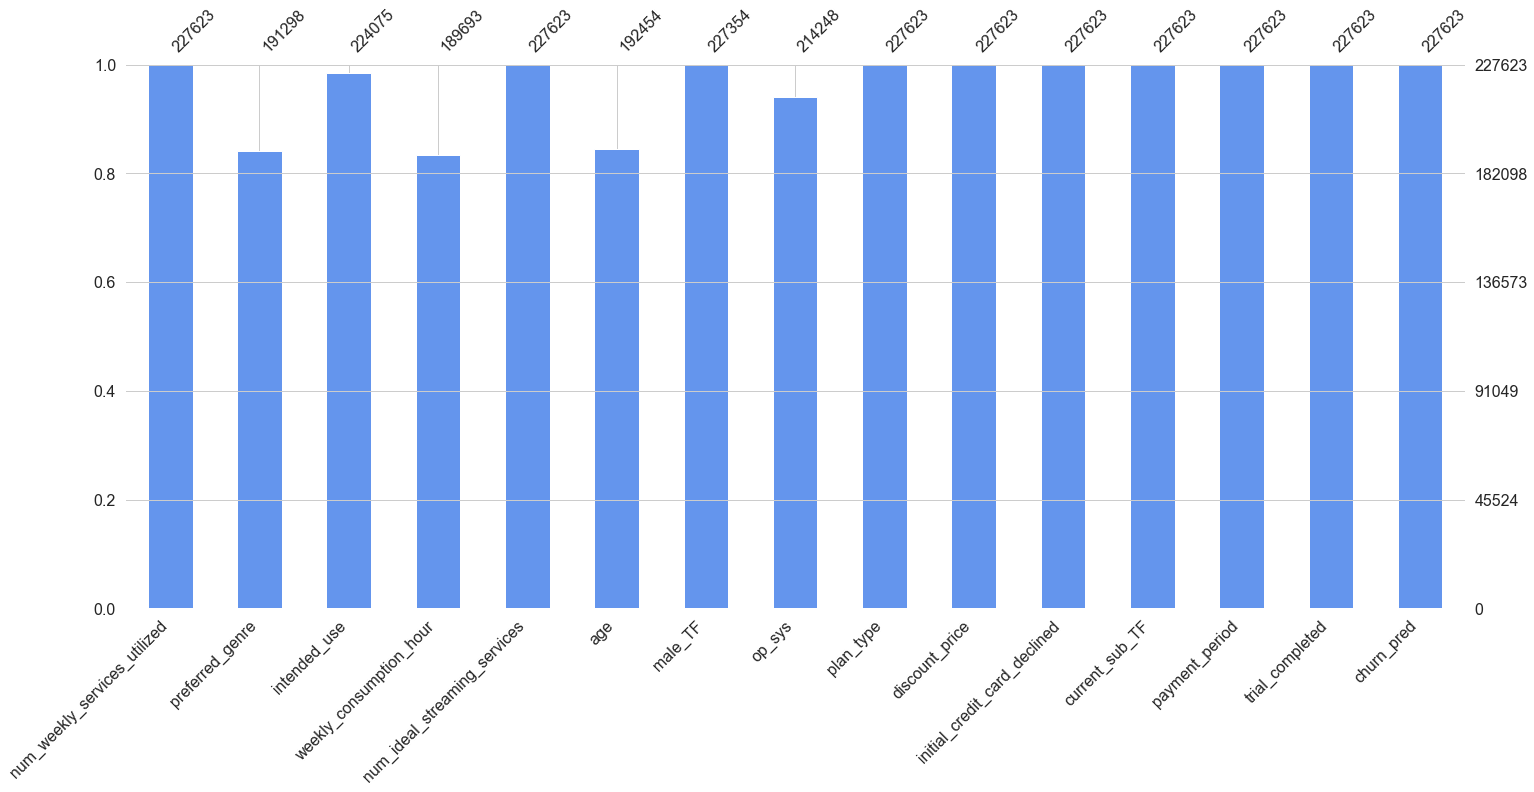

In [501]:
msno.bar(df2,color = 'cornflowerblue')

In [502]:
# df_0 = df_0.dropna()

In [503]:
df2 = df2.dropna()

In [504]:
# df_0.drop(df_0[df_0['churn_pred'] == 'none'].index, inplace=True)

In [505]:
df2.drop(df2[df2['churn_pred'] == 'none'].index, inplace=True)

In [506]:
# df_0 = pd.get_dummies(df_0, columns=['preferred_genre','intended_use','op_sys','plan_type',])

In [507]:
df2 = pd.get_dummies(df2, columns=['preferred_genre','intended_use','op_sys','plan_type',])

In [508]:
# del df_0['payment_period']
# del df_0['current_sub_TF']
# del df_0['trial_completed']

In [509]:
del df2['payment_period']
del df2['current_sub_TF']
del df2['trial_completed']

In [510]:
# df_0['male_TF'] = df_0['male_TF'].astype(int)
# df_0['initial_credit_card_declined'] = df_0['initial_credit_card_declined'].astype(int)
# df_0['current_sub_TF'] = df_0['current_sub_TF'].astype(int)

In [511]:
df2['male_TF'] = df2['male_TF'].astype(int)
df2['initial_credit_card_declined'] = df2['initial_credit_card_declined'].astype(int)

In [512]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129592 entries, 2 to 227625
Data columns (total 24 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   num_weekly_services_utilized              129592 non-null  float64
 1   weekly_consumption_hour                   129592 non-null  float64
 2   num_ideal_streaming_services              129592 non-null  float64
 3   age                                       129592 non-null  float64
 4   male_TF                                   129592 non-null  int64  
 5   discount_price                            129592 non-null  float64
 6   initial_credit_card_declined              129592 non-null  int64  
 7   churn_pred                                129592 non-null  object 
 8   preferred_genre_comedy                    129592 non-null  uint8  
 9   preferred_genre_drama                     129592 non-null  uint8  
 10  preferred_genre_inte

In [513]:
df2['churn_pred'].astype(int)

2         1
3         1
4         0
6         0
7         0
         ..
227621    0
227622    0
227623    0
227624    0
227625    0
Name: churn_pred, Length: 129592, dtype: int64

In [514]:
from sklearn.model_selection import train_test_split

In [515]:
# X = df_0.copy()
# Y = df_0['churn_pred']

In [516]:
X = df2.copy()
Y = df2['churn_pred']

In [517]:
del X['churn_pred']

In [518]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [519]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38878 entries, 144845 to 71141
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   num_weekly_services_utilized              38878 non-null  float64
 1   weekly_consumption_hour                   38878 non-null  float64
 2   num_ideal_streaming_services              38878 non-null  float64
 3   age                                       38878 non-null  float64
 4   male_TF                                   38878 non-null  int64  
 5   discount_price                            38878 non-null  float64
 6   initial_credit_card_declined              38878 non-null  int64  
 7   preferred_genre_comedy                    38878 non-null  uint8  
 8   preferred_genre_drama                     38878 non-null  uint8  
 9   preferred_genre_international             38878 non-null  uint8  
 10  preferred_genre_other        

In [520]:
train_norm = (X_train - X_train.mean()) / (X_train.max() - X_train.min())
test_norm = (X_test - X_test.mean()) / (X_test.max() - X_test.min())

In [521]:
train_norm['churn_pred'] = pd.Series(y_train,index = train_norm.index)
test_norm['churn_pred'] = pd.Series(y_test,index = test_norm.index)

In [522]:
train_norm['churn_pred'].value_counts()

0    64251
1    26463
Name: churn_pred, dtype: int64

In [523]:
test_norm

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,op_sys_Android,op_sys_iOS,plan_type_base_14_day_trial,plan_type_high_14_day_trial,churn_pred
144845,-0.002693,0.046823,-0.000747,-0.000053,-0.13316,...,-0.350481,0.350481,0.002058,-0.002058,0
60077,-0.003675,-0.021670,-0.013000,-0.000061,-0.13316,...,0.649519,-0.649519,0.002058,-0.002058,0
119825,-0.002693,-0.007971,-0.000747,-0.000064,-0.13316,...,-0.350481,0.350481,0.002058,-0.002058,0
104364,-0.003675,0.033125,-0.013000,-0.000054,-0.13316,...,0.649519,-0.649519,0.002058,-0.002058,0
124643,-0.114786,-0.049067,-0.013000,-0.000055,-0.13316,...,-0.350481,0.350481,0.002058,-0.002058,0
...,...,...,...,...,...,...,...,...,...,...,...
120031,-0.003675,-0.021670,-0.013000,-0.000053,-0.13316,...,-0.350481,0.350481,0.002058,-0.002058,1
103827,-0.114786,0.033125,-0.013000,-0.000070,-0.13316,...,-0.350481,0.350481,0.002058,-0.002058,0
135518,-0.002693,0.019426,-0.000747,-0.000053,-0.13316,...,-0.350481,0.350481,0.002058,-0.002058,0
97383,-0.002693,-0.049067,-0.000747,-0.000064,-0.13316,...,-0.350481,0.350481,0.002058,-0.002058,0


In [524]:
train_norm['churn_pred'].value_counts()

0    64251
1    26463
Name: churn_pred, dtype: int64

In [525]:
test_norm['churn_pred'].value_counts()

0    27556
1    11322
Name: churn_pred, dtype: int64

In [526]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = train_norm.drop(columns=["churn_pred"])  #features
y = train_norm.churn_pred  # target variable
logistic_regression = LogisticRegression(max_iter = 10000) #Could set/change solver and iterations
logistic_regression.fit(x, y)
#logistic_regression.coef_
#logistic_regression.intercept_

LogisticRegression(max_iter=10000)

In [527]:
test_x = test_norm.drop(columns=["churn_pred"])
probability = logistic_regression.predict_proba(test_x)[:, 1] #So only look at = 1 aka Defaulters here
pred_y = logistic_regression.predict(test_x)
pred_y

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [528]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_norm["churn_pred"], pred_y)
cm

array([[25253,  2303],
       [ 6099,  5223]])

In [529]:
pred_y.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

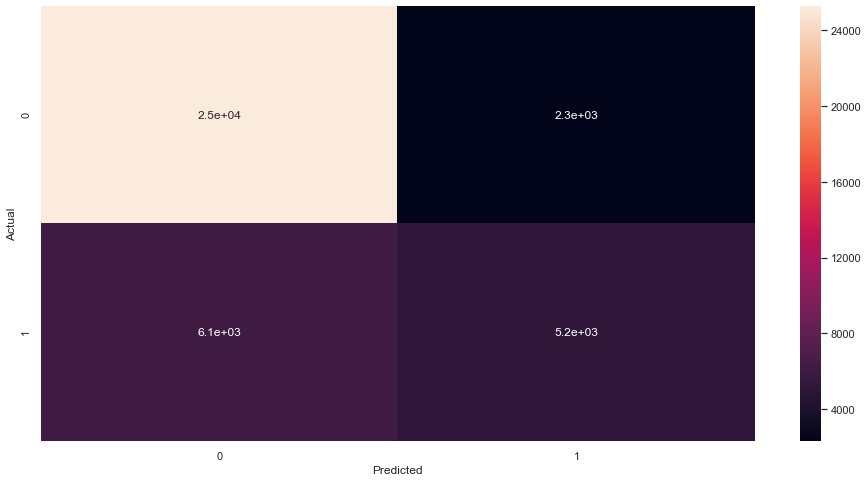

Logistic ROC AUC:    0.80027
Accuracy:            0.78389
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     27556
           1       0.69      0.46      0.55     11322

    accuracy                           0.78     38878
   macro avg       0.75      0.69      0.71     38878
weighted avg       0.77      0.78      0.77     38878



In [536]:
#Alright let's get serious and spit out all the metrics officially/beautifully
import sklearn
import numpy as np
from sklearn import metrics, preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, recall_score, classification_report
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

test_y = test_norm["churn_pred"]

confusion_matrix = pd.crosstab(test_y, pred_y, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

log_reg_auc = roc_auc_score(test_y, probability)

print('Logistic ROC AUC:    %.5f' % (log_reg_auc))
print('Accuracy:            %.5f' % (accuracy_score(test_y, pred_y)))
# print('f1 score:            %.5f' % (f1_score(test_y,pred_y)))
#print('Recall:              %.5f' % (recall_score(test_y,pred_y)))
# print('False negative rate: %.5f' % (confusion_matrix[1][0]/(confusion_matrix[1][0]+confusion_matrix[1][1])))
print(classification_report(test_y, pred_y))


In [543]:
logistic_regression.coef_

array([[-13.89736754,  -6.71065253,  -0.03157579,   0.41411409,
          1.14953507,  -0.6852681 ,  -0.12832152,  -1.27851447,
          0.22257249,   0.26909636,   0.99979844,  -0.21295281,
         -0.76346699,  -0.28215343,  -0.25973927,   0.66909541,
          0.46775209,   1.05079859,  -0.88228641,   0.05032692,
         -0.05032692,  -0.16623848,   0.16623848]])